In [813]:
"""
---------------------------------------------------------------------------------------------------------
saha prediction_python_file.ipynb| INTEGRATION PLANNING at SFB
---------------------------------------------------------------------------------------------------------
Author:SOUMYAJIT SAHA, Student ID:220031702
Synopsis: This snippet is for developing supervised model for ROC package acceptance prediction and categorising employees 
to offer ROC package. Finally some additional calculation is performed to supplement excel optimization solver and 
performing checks against discrimination while grouping
"""

'\n---------------------------------------------------------------------------------------------------------\nsaha SMM750.ipynb| INTEGRATION PLANNING at SFB\n---------------------------------------------------------------------------------------------------------\nAuthor:SOUMYAJIT SAHA, Student ID:220031702\nSynopsis: This snippet is for developing supervised model for ROC package acceptance prediction and categorising employees \nto offer ROC package. Finally some additional calculation is performed to supplement excel optimization solver and \nperforming checks against discrimination while grouping\n'

### import packages

In [814]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from sklearn import decomposition as dcp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', 500)


### loading the data

In [815]:
df_prev = pd.read_csv("employee_attrition_previous_closure.csv")

In [816]:
df_lyon=pd.read_csv("employee_attrition_lyon.csv")

## Preprocessing of data

### checking the staus of dfs for missing values and duplicates

In [817]:
df_prev.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [818]:
df_prev.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [819]:
df_lyon.isnull().sum()

Age                         55
BusinessTravel               5
DailyRate                   14
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                3
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

#### both dataset have similar issues regarding missing values

#### checking correlations for collinearity

<AxesSubplot:>

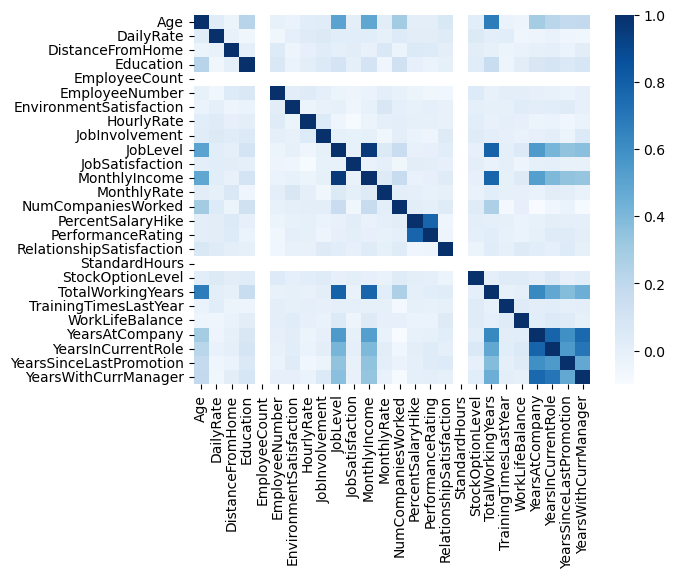

In [820]:
corr =df_prev.corr()

sns.heatmap(corr, cmap="Blues", xticklabels=True, yticklabels=True,annot=False)

#### 
correlations show that last 4 columns and age are highly collinear. The last 4 captures different attributes regarding an employee so they cant't be deleted. But Age can be deleted as that dimension is also intuitively captured by number of years worked and correlation too shows significant relation. So deleting age can get rid of null values in thay column too

### Checking for duplicates

In [821]:
df_prev.duplicated().unique()

array([False])

In [822]:
df_lyon.duplicated().unique()

array([False])

####
Conclusion is that no duplicates

### Checking for same value in all rows

In [823]:
print(df_prev.columns.to_list())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [824]:
single_col=[]
for x in df_prev.columns.to_list():
       if len(df_prev[x].unique())==1:
            print(f"no of unique values in the column {x} is {len(df_prev[x].unique())} ")
            single_col.append(x)

no of unique values in the column EmployeeCount is 1 
no of unique values in the column Over18 is 1 
no of unique values in the column StandardHours is 1 


In [825]:
for x in df_lyon.columns.to_list():
    if len(df_lyon[x].unique())==1:
        print(f"no of unique values in the column {x} is {len(df_lyon[x].unique())} ")
        

no of unique values in the column EmployeeCount is 1 
no of unique values in the column Over18 is 1 
no of unique values in the column StandardHours is 1 


In [826]:
print(single_col)

['EmployeeCount', 'Over18', 'StandardHours']


#### the above three column should be deleted

In [827]:
### checkiing data types of each columns:
for x in df_lyon.columns.to_list():
    
        print(f"data type  of column {x} is {type(df_lyon[x][0])} ")
        

data type  of column Age is <class 'numpy.float64'> 
data type  of column BusinessTravel is <class 'str'> 
data type  of column DailyRate is <class 'numpy.float64'> 
data type  of column Department is <class 'str'> 
data type  of column DistanceFromHome is <class 'numpy.float64'> 
data type  of column Education is <class 'numpy.int64'> 
data type  of column EducationField is <class 'str'> 
data type  of column EmployeeCount is <class 'numpy.int64'> 
data type  of column EmployeeNumber is <class 'numpy.int64'> 
data type  of column EnvironmentSatisfaction is <class 'numpy.int64'> 
data type  of column Gender is <class 'str'> 
data type  of column HourlyRate is <class 'numpy.int64'> 
data type  of column JobInvolvement is <class 'numpy.int64'> 
data type  of column JobLevel is <class 'numpy.int64'> 
data type  of column JobRole is <class 'str'> 
data type  of column JobSatisfaction is <class 'numpy.int64'> 
data type  of column MaritalStatus is <class 'str'> 
data type  of column Monthly

### qn 1 Using Python, complete the prediction task outlined in Part B of the case. In particular, develop a model that allows you to predict the probability of employees at the Lyon facility accepting an RCC if it is offered to them. Make sure that your code prints out the predicted probability for each employee (e.g., as a list). What are the most important factors in determining whether an employee will accept an RCC?

### because the column has no information

In [828]:


df_prev.drop(columns={"EmployeeCount","StandardHours","Over18","EmployeeNumber"},inplace=True)
df_prev.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


### Imputing values in the columns

In [829]:


## age is numerical so filled with mean

df_prev["Age"].fillna((df_prev["Age"].mean()),inplace=True)

##daily rate and distance from home is also numerical so filled with mean

df_prev["DailyRate"].fillna((df_prev["DailyRate"].mean()),inplace=True)

df_prev["DistanceFromHome"].fillna((df_prev["DistanceFromHome"].mean()),inplace=True)

In [830]:
##business travel is categorical so filled with mode

df_prev["MaritalStatus"].fillna((df_prev["MaritalStatus"].mode()[0]),inplace=True)
df_prev["BusinessTravel"].fillna((df_prev["BusinessTravel"].mode()[0]),inplace=True)



In [831]:
df_prev.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### changing attrition to binary column


In [832]:
df_prev["Attrition"] =np.where(df_prev["Attrition"]=="Yes",1,0)



In [833]:
df_prev.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


## first try with logistic model

In [834]:
y=df_prev["Attrition"] #creating the dependent variable

X=df_prev.drop(columns=["Attrition"])
X = pd.get_dummies(X)

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 615)
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 234)
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())



C:\Users\Soumyajit\anaconda3\envs\businessanalytics\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

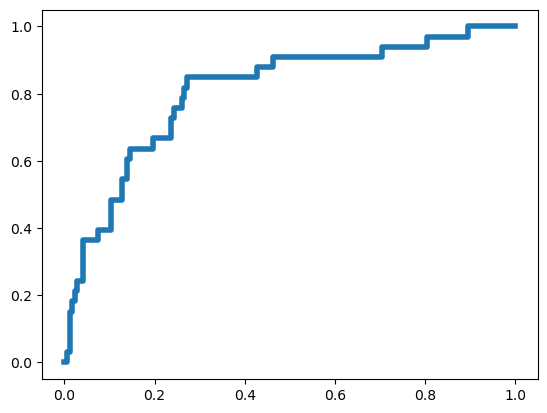

0.8074969346645647

In [835]:
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
# ROC-AUC score of the model
metrics.roc_auc_score(y_validation, y_pred_prob)

### going through the cas study we see that daily rate, monthly and hourly rate does not add value 
### they are just preloaded value into the system and has no significance

In [836]:
df_prev.drop(columns={"DailyRate","HourlyRate","MonthlyRate"},inplace=True)
df_prev.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,Research & Development,1.000000,2,Medical,4,Male,3,4,Research Director,4,Divorced,17399,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,Research & Development,6.000000,2,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,4941,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,Sales,7.000000,1,Marketing,2,Male,3,1,Sales Representative,2,Single,2679,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,Human Resources,9.930407,3,Medical,1,Male,3,5,Manager,2,Married,18200,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,Research & Development,7.000000,4,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,10445,7,No,19,3,4,0,18,4,3,8,6,4,0


### trying logistics regression again

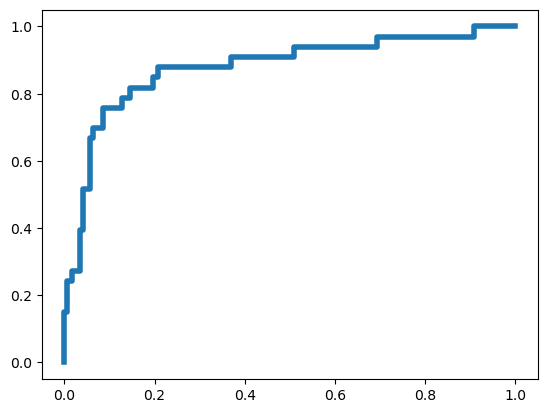

0.8782623927132598

In [837]:
y=df_prev["Attrition"] #creating the dependent variable

X=df_prev.drop(columns=["Attrition"])
X = pd.get_dummies(X)

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 615)
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 234)
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
# ROC-AUC score of the model
metrics.roc_auc_score(y_validation, y_pred_prob)

### dropping the age variable as we saw it has high correlation with other variables and scaling income to log as it has high values compared to others that may effect co-efficient values

In [838]:
df_prev.drop(columns={"Age"},inplace=True)
df_prev['MonthlyIncome']=df_prev['MonthlyIncome'].apply(np.log)
df_prev.head()    

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,Travel_Rarely,Research & Development,1.000000,2,Medical,4,Male,3,4,Research Director,4,Divorced,9.764168,9,No,22,4,3,1,32,1,2,5,4,1,3
1,0,Travel_Rarely,Research & Development,6.000000,2,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,8.505323,6,No,20,4,4,2,7,0,3,3,2,0,1
2,1,Travel_Rarely,Sales,7.000000,1,Marketing,2,Male,3,1,Sales Representative,2,Single,7.893199,1,No,13,3,2,0,1,3,3,1,0,1,0
3,0,Travel_Frequently,Human Resources,9.930407,3,Medical,1,Male,3,5,Manager,2,Married,9.809177,1,No,11,3,3,1,32,2,3,32,5,10,7
4,0,Travel_Rarely,Research & Development,7.000000,4,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,9.253879,7,No,19,3,4,0,18,4,3,8,6,4,0


### trying logistics regression again

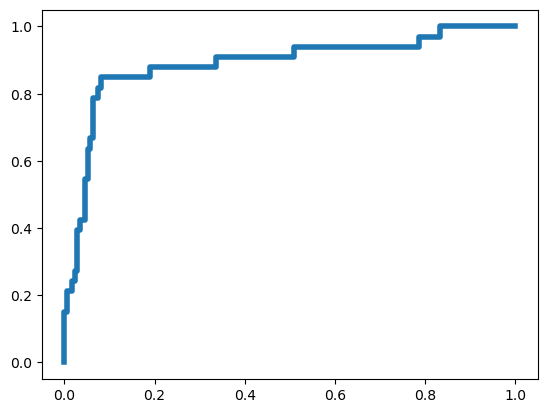

0.8889472762305132

In [839]:
y=df_prev["Attrition"] #creating the dependent variable

X=df_prev.drop(columns=["Attrition"])
X = pd.get_dummies(X)

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 615)
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 234)
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

# ROC-AUC score of the model
metrics.roc_auc_score(y_validation, y_pred_prob)

In [840]:
J = tpr - fpr
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J)]))
threshold = thresholds[np.argmax(J)]
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
print(metrics.accuracy_score(y_validation,y_validation_pred))
print(metrics.f1_score(y_validation,y_validation_pred))
metrics.confusion_matrix(y_validation, y_validation_pred)

The best threshold according to the J statistic is 0.2756881730278302
0.9077669902912622
0.7466666666666666


array([[159,  14],
       [  5,  28]], dtype=int64)

In [841]:
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

,Variable,Coefficient
46,OverTime_Yes,0.822357
44,MaritalStatus_Single,0.720183
20,BusinessTravel_Travel_Frequently,0.652446
41,JobRole_Sales Representative,0.636958
30,EducationField_Technical Degree,0.466904
25,EducationField_Human Resources,0.406557
34,JobRole_Human Resources,0.379157
35,JobRole_Laboratory Technician,0.312579
37,JobRole_Manufacturing Director,0.264134
32,Gender_Male,0.248238


### checking for decison tree model

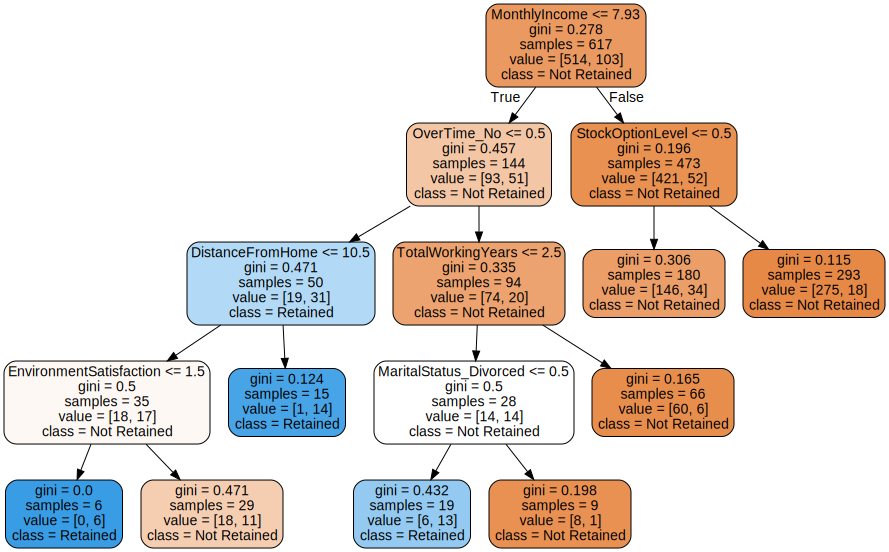

In [842]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 8)
classifier_DT.fit(X_train, y_train)

dot_data = export_graphviz(classifier_DT, feature_names = X_train.columns, filled = True, rounded = True, class_names=["Not Retained","Retained"])
graph = gp.Source(dot_data)
graph

In [843]:
y_pred_prob = classifier_DT.predict_proba(X_validation)[:,1] # probabilities
metrics.roc_auc_score(y_validation, y_pred_prob)

0.6941671045717288

#### checking confusion matrix, accuracy and f1 score to double check and compare before rejecting decison tree model
As checking only AUC score is not robust enough ctriteria to check. Finally, checking all the score, logistics was kept

In [844]:
J = tpr - fpr
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J)]))
threshold = thresholds[np.argmax(J)]
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
print(metrics.accuracy_score(y_validation,y_validation_pred))
print(metrics.f1_score(y_validation,y_validation_pred))
metrics.confusion_matrix(y_validation, y_validation_pred)

The best threshold according to the J statistic is 0.2756881730278302
0.8398058252427184
0.3529411764705882


array([[164,   9],
       [ 24,   9]], dtype=int64)

### Similarly trying and rejecting random forest classifier approach too

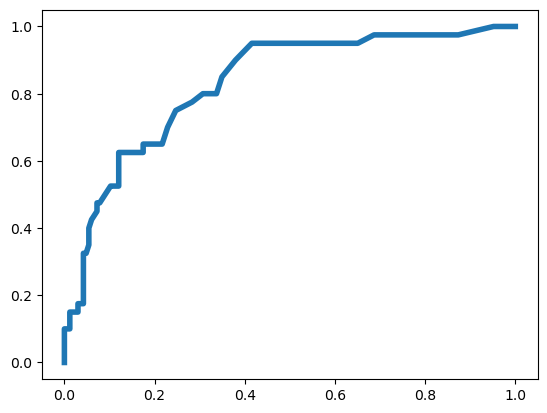

roc auc score 0.8306475903614458
0.7766990291262136
0.08


array([[158,  15],
       [ 31,   2]], dtype=int64)

In [845]:

#Create a Gaussian Classifier
RFC=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)


y_pred_prob=RFC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()
print("roc auc score",metrics.roc_auc_score(y_test, y_pred_prob))

y_validation_pred = np.where(y_pred_prob < 0.5, 0, 1)
print(metrics.accuracy_score(y_validation,y_validation_pred))
print(metrics.f1_score(y_validation,y_validation_pred))
metrics.confusion_matrix(y_validation, y_validation_pred)

In [846]:
X_end=X_train.append(X_validation)
y_end=y_train.append(y_validation)

classifier_LR.fit(X_end, y_end.values.ravel())

C:\Users\Soumyajit\AppData\Local\Temp\ipykernel_17708\2961311467.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_end=X_train.append(X_validation)
C:\Users\Soumyajit\AppData\Local\Temp\ipykernel_17708\2961311467.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_end=y_train.append(y_validation)


LogisticRegression(max_iter=2000)

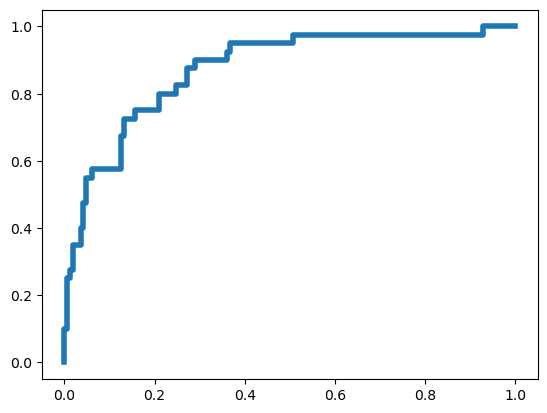

In [847]:
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [848]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.8725903614457831

## there is still variation in numeric columns.......so scaler transformation is preferred


In [849]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['DistanceFromHome', 'EnvironmentSatisfaction',  'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction'
                    ,'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany'
                    ,'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [850]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_validation[numerical_columns] = scaler.transform(X_validation[numerical_columns])

#### making ready final logistic model

In [851]:
classifier_LR = LogisticRegression(
    max_iter=2000,
    solver='liblinear')

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [1000,100, 10, 1, 0.1, 0.01, 0.001, ],
    'class_weight': ['balanced', None]
}

clf = GridSearchCV(classifier_LR, parameters, scoring="f1", cv=5)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, solver='liblinear'),
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [852]:
print(clf.best_params_)

{'C': 1, 'class_weight': None, 'penalty': 'l1'}


In [853]:
classifier_LR = LogisticRegression(
    max_iter=2000,
    penalty='l1',
    solver='liblinear',
    C=1, class_weight=None)

classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1, max_iter=2000, penalty='l1', solver='liblinear')

### Summary of logistic coeffcients

In [854]:
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary

,Variable,Coefficient
15,YearsAtCompany,0.610216
17,YearsSinceLastPromotion,0.599536
44,MaritalStatus_Single,0.483669
7,NumCompaniesWorked,0.457802
20,BusinessTravel_Travel_Frequently,0.332307
41,JobRole_Sales Representative,0.303588
0,DistanceFromHome,0.230073
30,EducationField_Technical Degree,0.197784
1,Education,0.069785
8,PercentSalaryHike,0.041972


In [855]:
summary.to_csv("summary.csv")


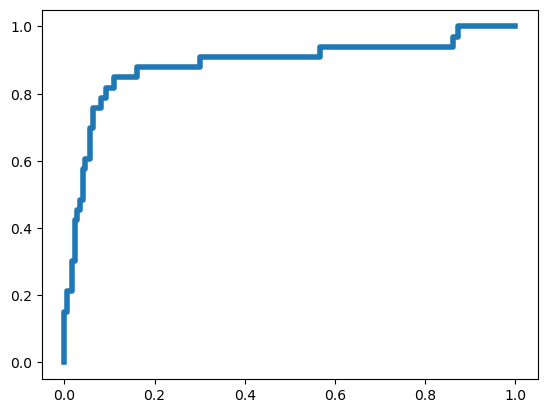

In [856]:
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [857]:
metrics.roc_auc_score(y_validation, y_pred_prob)

0.8868453319320372

In [858]:
J = tpr - fpr
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J)]))
threshold = thresholds[np.argmax(J)]
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
print(metrics.accuracy_score(y_validation,y_validation_pred))
print(metrics.f1_score(y_validation,y_validation_pred))
metrics.confusion_matrix(y_validation, y_validation_pred)

The best threshold according to the J statistic is 0.2548586211013412
0.883495145631068
0.7


array([[154,  19],
       [  5,  28]], dtype=int64)

#### moving onto final prediction

### loading and preprocessing

In [859]:
df_lyon_pred=pd.read_csv("employee_attrition_lyon.csv")
df_lyon=pd.read_csv("employee_attrition_lyon.csv")

In [860]:
df_lyon.drop(columns={"EmployeeCount","StandardHours","Over18",'Age','DailyRate',"MonthlyRate",'HourlyRate'},inplace=True)
##business travel is categorical so filled with mode
df_lyon["MaritalStatus"].fillna((df_lyon["MaritalStatus"].mode()[0]),inplace=True)

df_lyon["BusinessTravel"].fillna((df_lyon["BusinessTravel"].mode()[0]),inplace=True)

df_lyon["DistanceFromHome"].fillna((df_lyon["DistanceFromHome"].mean()),inplace=True)

df_lyon['MonthlyIncome']=df_lyon['MonthlyIncome'].apply(np.log)

df_lyon.head()    


,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,9.459948,3,Medical,1469,4,Male,3,2,Sales Executive,1,Single,9.043459,0,No,18,3,4,0,6,4,3,5,4,1,3
1,Travel_Rarely,Research & Development,13.000000,2,Medical,250,4,Female,4,2,Manufacturing Director,1,Divorced,8.400659,1,No,11,3,3,2,5,3,3,4,2,1,3
2,Travel_Rarely,Human Resources,22.000000,1,Human Resources,1714,4,Male,1,1,Human Resources,3,Married,7.349231,1,No,11,3,3,1,1,2,3,1,0,0,0
3,Travel_Rarely,Research & Development,7.000000,3,Life Sciences,86,2,Male,3,3,Research Scientist,1,Divorced,9.182352,2,No,17,3,3,1,25,2,3,1,0,0,0
4,Travel_Rarely,Research & Development,9.459948,2,Life Sciences,304,4,Male,3,2,Laboratory Technician,2,Single,8.685078,8,No,16,3,4,0,16,3,4,13,11,3,7


In [861]:

df_lyon =pd.get_dummies(df_lyon)

### seperating input parameters

In [862]:
X_lyon=df_lyon.drop(columns={"EmployeeNumber"})
X_lyon[numerical_columns] = scaler.transform(X_lyon[numerical_columns])

In [863]:
X_lyon.head()

,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,-0.068214,3,1.191375,0.411252,-0.066115,-1.556752,0.729390,-1.032776,0.768762,-0.429256,1.225798,-0.972778,-0.676594,0.904993,0.369714,-0.328168,-0.043892,-0.330561,-0.284050,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,0.364512,2,1.191375,1.844826,-0.066115,-1.556752,-0.221900,-0.634263,-1.158274,-0.429256,0.297801,1.349094,-0.804063,0.139039,0.369714,-0.490411,-0.602267,-0.330561,-0.284050,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,1.464649,1,1.191375,-2.455896,-0.952917,0.271061,-1.777926,-0.634263,-1.158274,-0.429256,0.297801,0.188158,-1.313936,-0.626916,0.369714,-0.977141,-1.160643,-0.656892,-1.118615,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,-0.368912,3,-0.612498,0.411252,0.820687,-1.556752,0.934941,-0.235749,0.493471,-0.429256,0.297801,0.188158,1.745304,-0.626916,0.369714,-0.977141,-1.160643,-0.656892,-1.118615,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,-0.068214,2,1.191375,0.411252,-0.066115,-0.642845,0.199016,2.155330,0.218180,-0.429256,1.225798,-0.972778,0.598089,0.139039,1.831980,0.969778,1.910423,0.322099,0.828704,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


### visually compare with upper dataframe to check

In [864]:
X_train.head()

,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
993,-1.102336,2,1.191375,0.411252,1.707489,1.184968,1.770240,-0.235749,-0.057111,-0.429256,-0.630196,0.188158,1.872772,-0.626916,-1.092552,0.320805,1.072860,1.627420,1.106893,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
408,0.486750,2,1.191375,0.411252,-0.066115,-1.556752,-0.160343,-0.634263,-0.057111,-0.429256,0.297801,0.188158,-0.804063,-0.626916,0.369714,-0.328168,-0.043892,-0.330561,-0.562238,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
462,-0.010707,3,1.191375,-1.022322,-0.066115,0.271061,0.249204,-0.634263,-0.607692,-0.429256,0.297801,2.510030,-0.166721,-0.626916,0.369714,0.483048,1.352048,-0.330561,-0.562238,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
87,2.198073,3,0.289438,-2.455896,0.820687,-1.556752,1.108235,0.162764,-0.057111,-0.429256,0.297801,0.188158,1.107962,-0.626916,0.369714,-0.977141,-1.160643,-0.656892,-0.840427,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
864,-0.002200,3,0.289438,1.844826,0.820687,1.184968,1.447000,-0.634263,2.695798,2.329610,-1.558193,0.188158,0.598089,-0.626916,0.369714,1.456508,1.910423,1.301089,1.106893,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


## printing the predicted probabilities as a list

In [867]:
y_lyon_pred_prob = np.round(classifier_LR.predict_proba(X_lyon)[:,1],5)
print(list(y_lyon_pred_prob))

[0.08523, 0.01835, 0.46185, 0.00722, 0.05437, 0.21857, 0.24464, 0.09618, 0.15447, 0.04243, 0.60221, 0.10113, 0.10863, 0.06216, 0.02568, 0.05833, 0.06971, 0.2591, 0.25524, 0.08154, 0.37168, 0.00855, 0.043, 0.30995, 0.16818, 0.01648, 0.11208, 0.0157, 0.15381, 0.07725, 0.0078, 0.01344, 0.00287, 0.04085, 0.4613, 0.00643, 0.00266, 0.4075, 0.77494, 0.02564, 0.02073, 0.27209, 0.08495, 0.15846, 0.75366, 0.02472, 0.6843, 0.52174, 0.40747, 0.45774, 0.02578, 0.1024, 0.05098, 0.15489, 0.15155, 0.06846, 0.40961, 0.0006, 0.03475, 0.2355, 0.01403, 0.683, 0.06775, 0.0042, 0.1506, 0.52294, 0.04158, 0.10025, 0.01023, 0.13192, 0.21393, 0.07733, 0.23905, 0.13403, 0.02288, 0.00911, 0.06944, 0.12082, 0.09265, 0.05548, 0.00102, 0.27057, 0.02401, 0.16287, 0.06198, 0.09612, 0.20967, 0.11996, 0.02278, 0.02533, 0.01038, 0.14038, 0.48427, 0.43616, 0.06839, 0.1063, 0.0104, 0.2133, 0.24703, 0.10219, 0.10342, 0.00408, 0.02462, 0.22852, 0.00901, 0.07272, 0.02221, 0.48285, 0.07732, 0.00748, 0.4834, 0.59458, 0.01807, 0

In [869]:
print(y_lyon_pred_prob.max(),y_lyon_pred_prob.min())

0.85422 0.00034


### adding them to dataframe

In [883]:
df_lyon_pred['prob_RCC_yes'] = y_lyon_pred_prob
df_lyon_pred['prob_RCC_no'] = 1 - df_lyon_pred['prob_RCC_yes']

In [884]:
df_lyon_pred.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ind_severence_cost_2m,group_level,prob_RCC_yes,prob_RCC_no
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3,27504.750000,6.0,0.08523,0.91477
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3,13350.000000,6.0,0.01835,0.98165
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0,3498.750000,5.0,0.46185,0.53815
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0,21879.000000,5.0,0.00722,0.99278
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7,37455.333333,8.0,0.05437,0.94563


### calculating severance package

In [885]:
time=df_lyon_pred["YearsAtCompany"]
sal=df_lyon_pred["MonthlyIncome"]

In [886]:
df_lyon_pred["ind_severence_cost_2m"]=(time*(sal/4)+sal*2).where(time<10,time*(sal/3)+sal*2)

In [887]:
df_lyon_pred

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ind_severence_cost_2m,group_level,prob_RCC_yes,prob_RCC_no
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3,27504.750000,6.0,0.08523,0.91477
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3,13350.000000,6.0,0.01835,0.98165
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0,3498.750000,5.0,0.46185,0.53815
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0,21879.000000,5.0,0.00722,0.99278
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7,37455.333333,8.0,0.05437,0.94563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3,13119.000000,6.0,0.13210,0.86790
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4,20634.250000,2.0,0.10500,0.89500
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2,9526.000000,1.0,0.56010,0.43990
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4,16913.000000,6.0,0.01875,0.98125


### checking one value manually

In [888]:
8463/4

2115.75

In [889]:
2115.75*5+8463*2

27504.75

### idea of grouping based on time spent at the company with equal frequency by quantile

In [890]:
print(time.max(),time.min(),np.quantile(time,[0.25,0.5,0.75]))

40 0 [3. 5. 9.]


In [891]:
df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "Yes") & (df_lyon_pred['YearsAtCompany'] <= 3) , 'group_level'] = 1

df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "Yes") & (df_lyon_pred['YearsAtCompany'] > 3) & 
                 (df_lyon_pred['YearsAtCompany'] <= 5) , 'group_level'] = 2  

df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "Yes") & (df_lyon_pred['YearsAtCompany'] >5) & 
                 (df_lyon_pred['YearsAtCompany'] <= 9) , 'group_level'] = 3

df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "Yes") & (df_lyon_pred['YearsAtCompany'] >9) , 'group_level'] = 4 


df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "No") & (df_lyon_pred['YearsAtCompany'] <= 3) , 'group_level'] = 5

df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "No") & (df_lyon_pred['YearsAtCompany'] > 3) & 
                 (df_lyon_pred['YearsAtCompany'] <= 5) , 'group_level'] = 6  

df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "No") & (df_lyon_pred['YearsAtCompany'] >5) & 
                 (df_lyon_pred['YearsAtCompany'] <= 9) , 'group_level'] = 7

df_lyon_pred.loc[(df_lyon_pred['OverTime'] == "No") & (df_lyon_pred['YearsAtCompany'] >9) , 'group_level'] = 8 


### calculate expected savings to observe

In [892]:
df_lyon_pred["exp_sav"]=df_lyon_pred["prob_RCC_yes"]*df_lyon_pred["MonthlyIncome"]

In [893]:
df_lyon_pred.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ind_severence_cost_2m,group_level,prob_RCC_yes,prob_RCC_no,exp_sav
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3,27504.750000,6.0,0.08523,0.91477,721.30149
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3,13350.000000,6.0,0.01835,0.98165,81.65750
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0,3498.750000,5.0,0.46185,0.53815,718.17675
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0,21879.000000,5.0,0.00722,0.99278,70.20728
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7,37455.333333,8.0,0.05437,0.94563,321.54418


In [894]:
#pd.get_dummies(df_lyon_pred.loc[df_lyon_pred["group_level"]==6],columns=['group_level']).iloc[:,30:38]
pd.get_dummies(df_lyon_pred,columns=['group_level','Department']).to_csv("grouping_try_1.csv")

In [898]:
df_lyon_pred[df_lyon_pred["prob_RCC_yes"]>=0.6]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ind_severence_cost_2m,group_level,prob_RCC_yes,prob_RCC_no,exp_sav
10,47.0,Travel_Rarely,1454.0,Sales,2.0,4,Life Sciences,1,925,4,Female,65,2,1,Sales Representative,4,Single,3294,13137,1,Y,Yes,18,3,1,80,0,3,3,2,3,2,1,2,9058.50,1.0,0.60221,0.39779,1983.67974
38,NaN,Travel_Rarely,1434.0,Research & Development,NaN,4,Technical Degree,1,65,3,Male,50,3,1,Laboratory Technician,3,Single,3441,11179,1,Y,Yes,13,3,3,80,0,2,3,2,2,2,2,2,8602.50,1.0,0.77494,0.22506,2666.56854
44,33.0,Travel_Rarely,350.0,Sales,NaN,3,Marketing,1,485,4,Female,34,3,1,Sales Representative,3,Single,2851,9150,1,Y,Yes,13,3,2,80,0,1,2,3,1,0,0,0,6414.75,1.0,0.75366,0.24634,2148.68466
46,40.0,Travel_Rarely,299.0,Sales,25.0,4,Marketing,1,1318,4,Male,57,2,3,Sales Executive,2,Single,9094,17235,2,Y,Yes,12,3,3,80,0,9,2,3,5,4,1,0,29555.50,2.0,0.68430,0.31570,6223.02420
61,21.0,Travel_Rarely,1334.0,Research & Development,10.0,3,Life Sciences,1,1079,3,Female,36,2,1,Laboratory Technician,1,Single,1416,17258,1,Y,No,13,3,1,80,0,1,6,2,1,0,1,0,3186.00,5.0,0.68300,0.31700,967.12800
140,NaN,Travel_Frequently,791.0,Research & Development,1.0,4,Medical,1,1286,4,Male,44,3,1,Laboratory Technician,3,Single,2154,6842,0,Y,Yes,11,3,3,80,0,5,2,2,4,2,0,2,6462.00,2.0,0.67820,0.32180,1460.84280
223,29.0,Travel_Frequently,115.0,Sales,13.0,3,Technical Degree,1,1487,1,Female,51,3,2,Sales Executive,2,Single,5765,17485,5,Y,No,11,3,1,80,0,7,4,1,5,3,0,0,18736.25,6.0,0.82484,0.17516,4755.20260
242,NaN,Travel_Rarely,1146.0,Sales,8.0,3,Technical Degree,1,796,4,Male,38,2,2,Sales Executive,1,Single,5326,3064,6,Y,No,17,3,3,80,0,6,2,2,4,3,1,2,15978.00,6.0,0.69938,0.30062,3724.89788
245,54.0,Travel_Rarely,157.0,Research & Development,10.0,3,Medical,1,1980,3,Female,77,3,2,Manufacturing Director,1,Single,4440,25198,6,Y,Yes,19,3,4,80,0,9,3,3,5,2,1,4,14430.00,2.0,0.63416,0.36584,2815.67040
309,33.0,Travel_Frequently,1076.0,Research & Development,NaN,3,Life Sciences,1,702,1,Male,70,3,1,Research Scientist,1,Single,3348,3164,1,Y,Yes,11,3,1,80,0,10,3,3,10,8,9,7,17856.00,4.0,0.85422,0.14578,2859.92856


In [803]:
pd.get_dummies(df_lyon_pred,columns=['group_level','Department']).iloc[1:10,34:49]

,prob_RCC_no,ind_severence_cost_2m,exp_sav,group_level_1.0,group_level_2.0,group_level_3.0,group_level_4.0,group_level_5.0,group_level_6.0,group_level_7.0,group_level_8.0,Department_Human Resources,Department_Research & Development,Department_Sales
1,0.98166,13350.000000,81.61300,0,0,0,0,0,1,0,0,0,1,0
2,0.53869,3498.750000,717.33705,0,0,0,0,1,0,0,0,1,0,0
3,0.99278,21879.000000,70.20728,0,0,0,0,1,0,0,0,0,1,0
4,0.94565,37455.333333,321.42590,0,0,0,0,0,0,0,1,0,1,0
5,0.78139,10316.000000,563.79519,0,0,1,0,0,0,0,0,0,0,1
6,0.75531,13747.500000,1035.03870,0,0,0,0,0,1,0,0,0,1,0
7,0.90375,6138.000000,214.83000,0,0,0,0,1,0,0,0,0,1,0
8,0.84551,73875.000000,1369.55385,0,0,0,0,0,0,0,1,0,0,1
9,0.95760,5105.250000,96.20560,0,0,0,0,1,0,0,0,0,1,0


In [900]:
df_lyon_pred.groupby(["Department","EnvironmentSatisfaction"])["Age","DistanceFromHome",'EmployeeCount'].mean("PercentSalaryHike")

C:\Users\Soumyajit\AppData\Local\Temp\ipykernel_17708\1581966938.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lyon_pred.groupby(["Department","EnvironmentSatisfaction"])["Age","DistanceFromHome",'EmployeeCount'].mean("PercentSalaryHike")


Age  DistanceFromHome  \
Department             EnvironmentSatisfaction                                
Human Resources        1                        34.500000          1.500000   
                       2                        37.750000         14.000000   
                       3                        39.285714          5.857143   
                       4                        37.500000          6.500000   
Research & Development 1                        38.511628          8.085106   
                       2                        35.204545         11.365854   
                       3                        38.222222          8.630137   
                       4                        39.542169          9.511364   
Sales                  1                        39.157895          8.812500   
                       2                        38.000000         10.285714   
                       3                        37.000000         10.333333   
                       4                        37.452381         10.615385   

                                                EmployeeCount  
Department             EnvironmentSatisfaction                 
Human Resources        1                                  1.0  
                       2                                  1.0  
                       3                                  1.0  
                       4                                  1.0  
Research & Development 1                                  1.0  
                       2                                  1.0  
                       3                                  1.0  
                       4                                  1.0  
Sales                  1                                  1.0  
                       2                                  1.0  
                       3                                  1.0  
                       4                                  1.0

In [901]:
print(len(df_lyon_pred.columns))
df_lyon_pred.columns

39


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'ind_severence_cost_2m', 'group_level',
       'prob_RCC_yes', 'prob_RCC_no', 'exp_sav'],
      dtype='object')

### Checking gender value and marital status discrimination:

In [926]:
df_lyon_pred.groupby("Gender")["Gender"].count()

Gender
Female    176
Male      265
Name: Gender, dtype: int64

In [927]:
df_lyon_pred.groupby("MaritalStatus")["MaritalStatus"].count()

MaritalStatus
Divorced     95
Married     193
Single      150
Name: MaritalStatus, dtype: int64

In [911]:
df_check=df_lyon_pred.groupby(["group_level","Gender"])["Gender"].count()
df_check.to_csv("gender.csv")

In [914]:
df_check

group_level  MaritalStatus
1.0          Divorced         14
             Married          17
             Single           10
2.0          Divorced          8
             Married          10
             Single            7
3.0          Divorced          9
             Married          12
             Single            6
4.0          Divorced          4
             Married          13
             Single            7
5.0          Divorced         18
             Married          39
             Single           38
6.0          Divorced          7
             Married          24
             Single           28
7.0          Divorced         21
             Married          39
             Single           26
8.0          Divorced         14
             Married          39
             Single           28
Name: MaritalStatus, dtype: int64

In [913]:
df_check=df_lyon_pred.groupby(["group_level","MaritalStatus"])["MaritalStatus"].count()
df_check.to_csv("marital.csv")

In [916]:
### checking for marital status

In [915]:
df_check

group_level  MaritalStatus
1.0          Divorced         14
             Married          17
             Single           10
2.0          Divorced          8
             Married          10
             Single            7
3.0          Divorced          9
             Married          12
             Single            6
4.0          Divorced          4
             Married          13
             Single            7
5.0          Divorced         18
             Married          39
             Single           38
6.0          Divorced          7
             Married          24
             Single           28
7.0          Divorced         21
             Married          39
             Single           26
8.0          Divorced         14
             Married          39
             Single           28
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

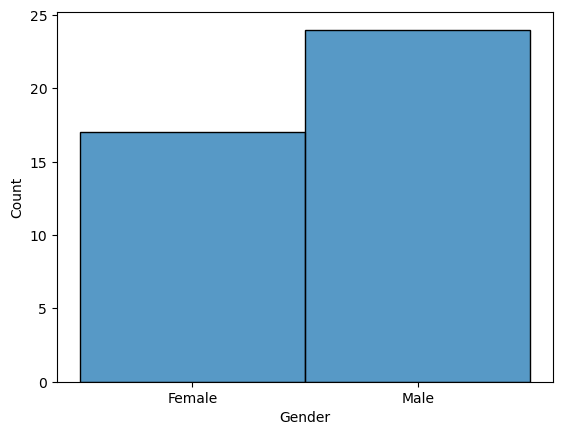

In [921]:
sns.histplot(df_lyon_pred.loc[(df_lyon_pred["group_level"]==1),"Gender"],kde=False)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

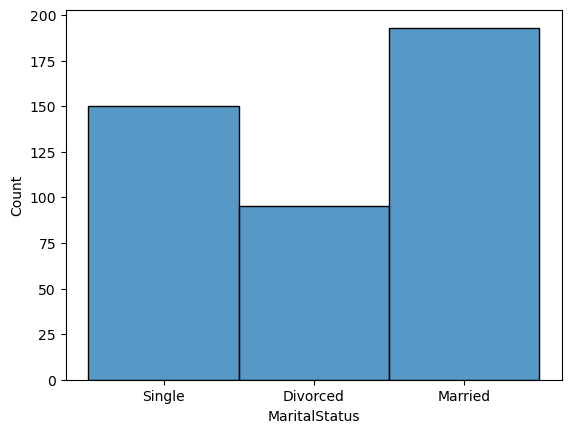

In [917]:
sns.histplot(df_lyon_pred["MaritalStatus"],kde=False)